# 3. Análise Exploratória dos Dados

Este arquivo contém o código relacionado à análise exploratória de dados (EDA).

Aqui contém visualizações, estatísticas descritivas, identificação de padrões, análise de correlações, detecção de outliers e outras técnicas para entender melhor os dados.



In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency # conversão de float para moeda local

# Não utilizar notação cientifica
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

# Carrega dados
df = pd.read_csv('../data/2_intermediate/2_df_feat_eng.csv')


In [2]:
# Coluna que apesar de ser inteiro, denota categoria
df['ID_CLIENTE'] = df['ID_CLIENTE'].astype(str)
df['DDD'] = df['DDD'].fillna(0).astype(int).astype(str)
df['CEP_2_DIG'] = df['CEP_2_DIG'].fillna(0).astype(int).astype(str)
df['DDD_1'] = df['DDD_1'].fillna(0).astype(int).astype(str)

# Converter colunas com data de str para datetime
df['DATA_CADASTRO'] = pd.to_datetime(df['DATA_CADASTRO'])
df['DATA_EMISSAO_DOCUMENTO'] = pd.to_datetime(df['DATA_EMISSAO_DOCUMENTO'])
df['DATA_PAGAMENTO'] = pd.to_datetime(df['DATA_PAGAMENTO'])
df['DATA_VENCIMENTO'] = pd.to_datetime(df['DATA_VENCIMENTO'])


df

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,...,MES_EMISSAO_DOCUMENTO,MES_PAGAMENTO,MES_VENCIMENTO,MES_CADASTRO,MES_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
0,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-16,2018-10-09,2018-10-08,22427.25,5.99,1,...,9,10,10,8,9,2018,2018,2018,2013,2018
1,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-23,2018-10-15,2018-10-15,35608.11,5.99,0,...,9,10,10,8,9,2018,2018,2018,2013,2018
2,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-08,2018-10-30,2018-10-29,17988.49,5.99,1,...,10,10,10,8,10,2018,2018,2018,2013,2018
3,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-17,2018-11-07,2018-11-06,41998.20,6.99,1,...,10,11,11,8,10,2018,2018,2018,2013,2018
4,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-21,2018-11-12,2018-11-12,35514.41,6.99,0,...,10,11,11,8,10,2018,2018,2018,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73472,3148228961195376491,2021-06-01,343507.00,134.00,2021-06-13,2021-07-26,2021-07-28,17302.05,4.99,-2,...,6,7,7,12,6,2021,2021,2021,2015,2021
73473,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-14,2021-06-28,2021-06-29,19799.30,6.99,-1,...,6,6,6,7,6,2021,2021,2021,2019,2021
73474,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-17,2021-07-01,2021-07-02,19913.15,11.99,-1,...,6,7,7,7,6,2021,2021,2021,2019,2021
73475,4799794458216343260,2021-06-01,70449.00,141.00,2021-06-14,2021-07-13,2021-07-09,2806.09,6.99,4,...,6,7,7,12,6,2021,2021,2021,2019,2021


In [3]:
novas_var = ['DIA_MES_EMISSAO', 'DIA_MES_PAGAMENTO', 'DIA_MES_VENCIMENTO', 'DIA_MES_CADASTRO', 'DIA_MES_SAFRA_REF', 'DIA_SEMANA_EMISSAO', 'DIA_SEMANA_PAGAMENTO', 
             'DIA_SEMANA_VENCIMENTO', 'DIA_SEMANA_CADASTRO', 'DIA_SEMANA_SAFRA_REF', 'MES_EMISSAO_DOCUMENTO', 'MES_PAGAMENTO', 'MES_VENCIMENTO', 'MES_CADASTRO',
             'MES_SAFRA_REF', 'ANO_EMISSAO_DOCUMENTO', 'ANO_PAGAMENTO', 'ANO_VENCIMENTO', 'ANO_CADASTRO', 'ANO_SAFRA_REF']

df[novas_var] = df[novas_var].astype(str)

****
Análise do prejuízo financeiro gerado pelas inadimplências

In [4]:
tamanho_base = len(df)
qtd_inadimp = len(df[df['INADIMPLENTE']])
porcent_inadimp = (len(df[df['INADIMPLENTE']]) / len(df)) 
valor_medio = df['VALOR_A_PAGAR'].mean()
prejuizo = tamanho_base * porcent_inadimp * valor_medio
valor_total = df['VALOR_A_PAGAR'].sum()


print(f'Tamanho da base: {tamanho_base}')
print(f'Quantidade de processos inadimplentes: {qtd_inadimp}')
print('% de processos inadimplentes: {:.2f} %'.format(porcent_inadimp * 100))
print(f"Valor médio: {format_currency(valor_medio, 'BRL', locale='pt_BR')}")
print(f"Valor total: {format_currency(valor_total, 'BRL', locale='pt_BR')}")
print(f"Prejuízo: {format_currency(prejuizo, 'BRL', locale='pt_BR')}")


Tamanho da base: 73477
Quantidade de processos inadimplentes: 5117
% de processos inadimplentes: 6.96 %
Valor médio: R$ 46.583,49
Valor total: R$ 3.422.815.286,52
Prejuízo: R$ 238.367.731,69


****
### Estatísticas gerais

In [5]:
df.shape

(73477, 46)

In [6]:
df.describe()

,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,DIAS_EMISSAO_PAGAMENTO,DIAS_EMISSAO_VENCIMENTO,TEMPO_VIDA_CLIENTE,PORCENTAGEM_INADIMPLENCIA_HIST,RENDA_ANTERIOR_POR_FUNCIONARIO,VALOR_PAGAR_POR_RENDA_ANTERIOR,VALOR_PAGAR_POR_NO_FUNCIONARIO
count,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00,73477.00
mean,290918.82,117.68,46583.49,6.79,-0.21,23.10,23.33,3628.47,6.96,2572.44,0.42,470.52
std,212971.78,18.76,46392.17,1.80,25.60,17.63,26.39,2266.78,14.24,2267.07,5.03,2081.29
min,105.00,1.00,0.10,4.99,-2661.00,0.00,0.00,0.00,0.00,0.88,0.00,0.00
25%,133814.00,105.00,18742.80,5.99,0.00,16.00,16.00,1889.00,0.00,1143.62,0.07,159.90
50%,240470.00,118.00,34752.00,5.99,0.00,18.00,18.00,3138.00,1.12,2082.87,0.15,299.06
75%,394913.00,130.00,60946.40,6.99,0.00,24.00,24.00,5671.00,5.21,3435.45,0.34,531.10
max,1682759.00,198.00,4400000.00,11.99,869.00,1074.00,2677.00,7624.00,100.00,114412.00,683.12,161999.20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73477 entries, 0 to 73476
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ID_CLIENTE                      73477 non-null  object        
 1   SAFRA_REF                       73477 non-null  object        
 2   RENDA_MES_ANTERIOR              73477 non-null  float64       
 3   NO_FUNCIONARIOS                 73477 non-null  float64       
 4   DATA_EMISSAO_DOCUMENTO          73477 non-null  datetime64[ns]
 5   DATA_PAGAMENTO                  73477 non-null  datetime64[ns]
 6   DATA_VENCIMENTO                 73477 non-null  datetime64[ns]
 7   VALOR_A_PAGAR                   73477 non-null  float64       
 8   TAXA                            73477 non-null  float64       
 9   DIAS_ATRASO                     73477 non-null  int64         
 10  INADIMPLENTE                    73477 non-null  bool          
 11  DI

In [8]:
# Verificando o percentual de valores nulos
total = df.isnull().sum()
percentual = (df.isnull().sum() / df.isnull().count() * 100)
pd.concat([total, percentual], axis=1, keys=['Total', 'Percentual'])

,Total,Percentual
ID_CLIENTE,0,0.00
SAFRA_REF,0,0.00
RENDA_MES_ANTERIOR,0,0.00
NO_FUNCIONARIOS,0,0.00
DATA_EMISSAO_DOCUMENTO,0,0.00
DATA_PAGAMENTO,0,0.00
DATA_VENCIMENTO,0,0.00
VALOR_A_PAGAR,0,0.00
TAXA,0,0.00
DIAS_ATRASO,0,0.00


Como será adotado o modelo XGBoost e esse tipo de algoritmo permite valores NaN, esses valores não serão dropados.

In [9]:
df['INADIMPLENTE'].unique()

array([False,  True])

In [10]:
df.groupby("INADIMPLENTE").mean().T

C:\Users\Fabio\AppData\Local\Temp\ipykernel_14472\2270346608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("INADIMPLENTE").mean().T


INADIMPLENTE,False,True
RENDA_MES_ANTERIOR,294899.93,237733.61
NO_FUNCIONARIOS,117.76,116.57
VALOR_A_PAGAR,47689.51,31807.82
TAXA,6.79,6.87
DIAS_ATRASO,-1.69,19.64
DIAS_EMISSAO_PAGAMENTO,20.84,53.38
DIAS_EMISSAO_VENCIMENTO,22.52,34.10
TEMPO_VIDA_CLIENTE,3648.21,3364.82
PORCENTAGEM_INADIMPLENCIA_HIST,4.78,36.08
RENDA_ANTERIOR_POR_FUNCIONARIO,2604.40,2145.56


In [11]:
variaveis_numericas = ['RENDA_MES_ANTERIOR', 'NO_FUNCIONARIOS', 'VALOR_A_PAGAR', 'TAXA', 'DIAS_ATRASO', 'DIAS_EMISSAO_PAGAMENTO', 'DIAS_EMISSAO_VENCIMENTO', 
                       'TEMPO_VIDA_CLIENTE', 'PORCENTAGEM_INADIMPLENCIA_HIST', 'RENDA_ANTERIOR_POR_FUNCIONARIO', 'VALOR_PAGAR_POR_RENDA_ANTERIOR', 
                       'VALOR_PAGAR_POR_NO_FUNCIONARIO']


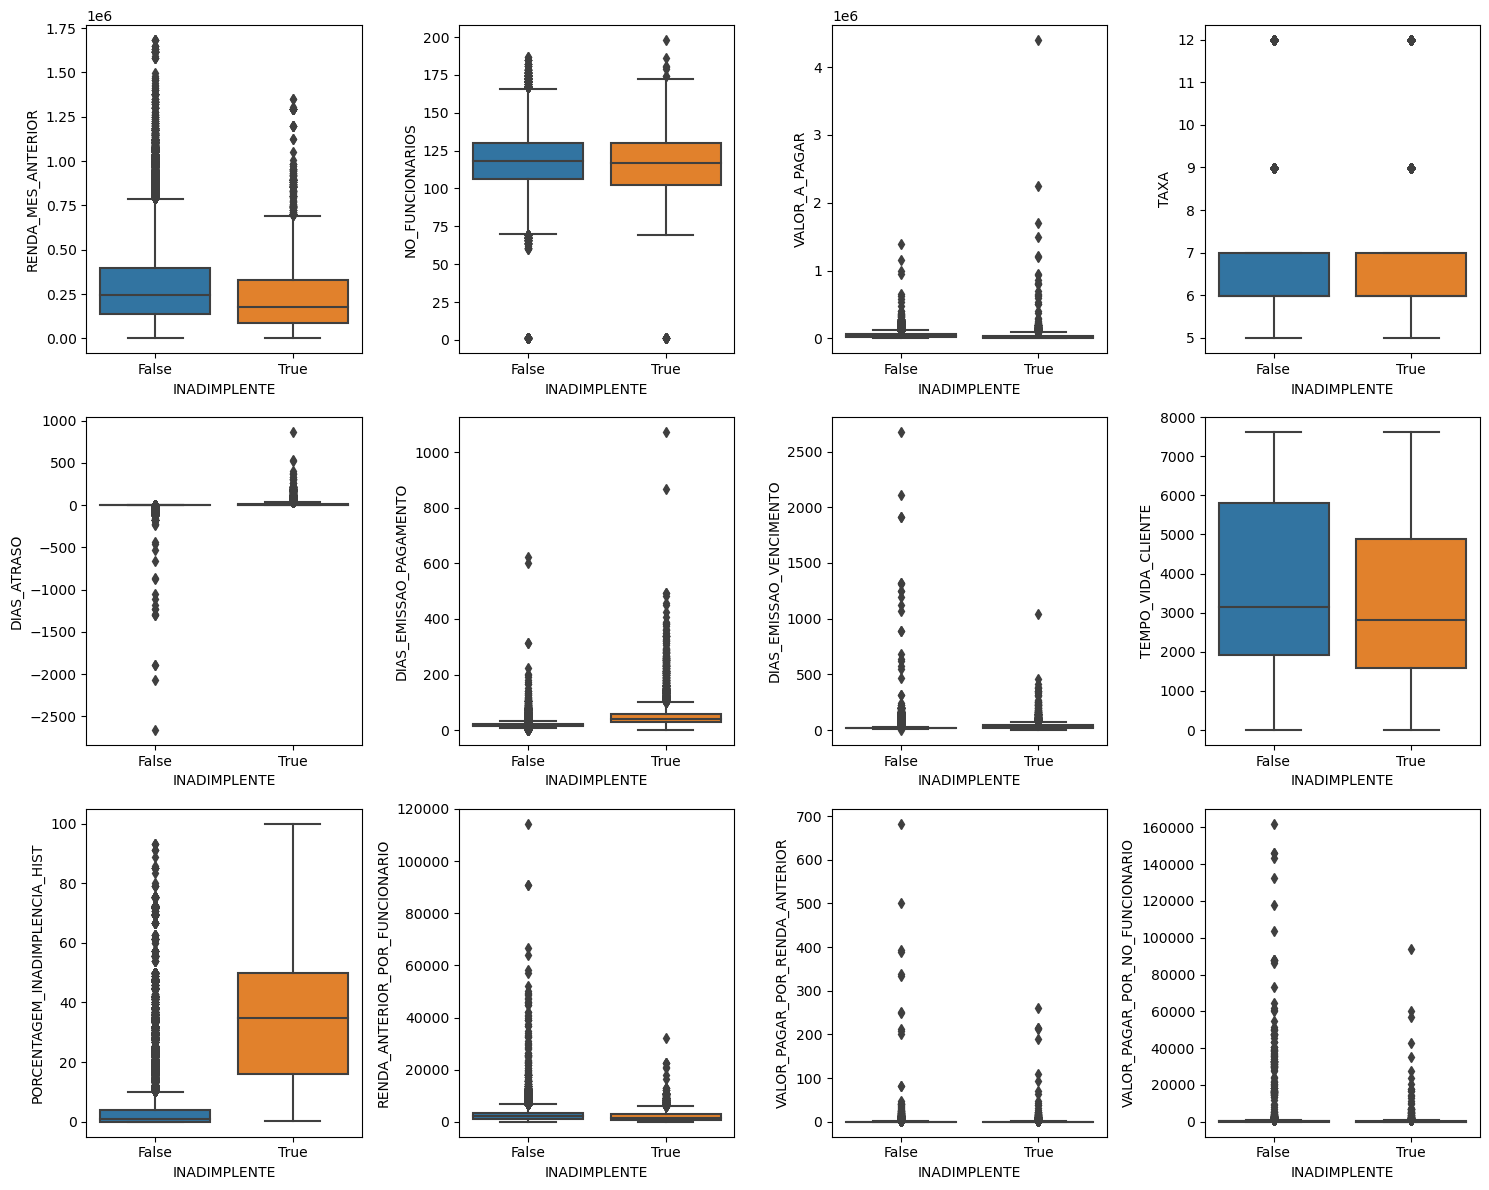

In [12]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(3, 4) 
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(x='INADIMPLENTE', y=i, data=df, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show()

****
#### Remoção apenas dos outliers visualmente distoantes

In [13]:
# Optei por remover apenas os casos visualmente distoantes.
df = df.drop(df[(df['VALOR_A_PAGAR'] > 2_000_000) | \
                (df['DIAS_ATRASO'] < -1_500) | \
                (df['DIAS_EMISSAO_PAGAMENTO'] > 600) | \
                (df['DIAS_EMISSAO_VENCIMENTO'] > 500) | \
                (df['RENDA_ANTERIOR_POR_FUNCIONARIO'] > 80_000) | \
                (df['VALOR_PAGAR_POR_RENDA_ANTERIOR'] > 1_000) | \
                (df['VALOR_PAGAR_POR_NO_FUNCIONARIO'] > 80_000)].index, axis=0)\
        .reset_index(drop=True)

df


,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,...,MES_EMISSAO_DOCUMENTO,MES_PAGAMENTO,MES_VENCIMENTO,MES_CADASTRO,MES_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
0,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-16,2018-10-09,2018-10-08,22427.25,5.99,1,...,9,10,10,8,9,2018,2018,2018,2013,2018
1,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-23,2018-10-15,2018-10-15,35608.11,5.99,0,...,9,10,10,8,9,2018,2018,2018,2013,2018
2,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-08,2018-10-30,2018-10-29,17988.49,5.99,1,...,10,10,10,8,10,2018,2018,2018,2013,2018
3,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-17,2018-11-07,2018-11-06,41998.20,6.99,1,...,10,11,11,8,10,2018,2018,2018,2013,2018
4,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-21,2018-11-12,2018-11-12,35514.41,6.99,0,...,10,11,11,8,10,2018,2018,2018,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73432,3148228961195376491,2021-06-01,343507.00,134.00,2021-06-13,2021-07-26,2021-07-28,17302.05,4.99,-2,...,6,7,7,12,6,2021,2021,2021,2015,2021
73433,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-14,2021-06-28,2021-06-29,19799.30,6.99,-1,...,6,6,6,7,6,2021,2021,2021,2019,2021
73434,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-17,2021-07-01,2021-07-02,19913.15,11.99,-1,...,6,7,7,7,6,2021,2021,2021,2019,2021
73435,4799794458216343260,2021-06-01,70449.00,141.00,2021-06-14,2021-07-13,2021-07-09,2806.09,6.99,4,...,6,7,7,12,6,2021,2021,2021,2019,2021


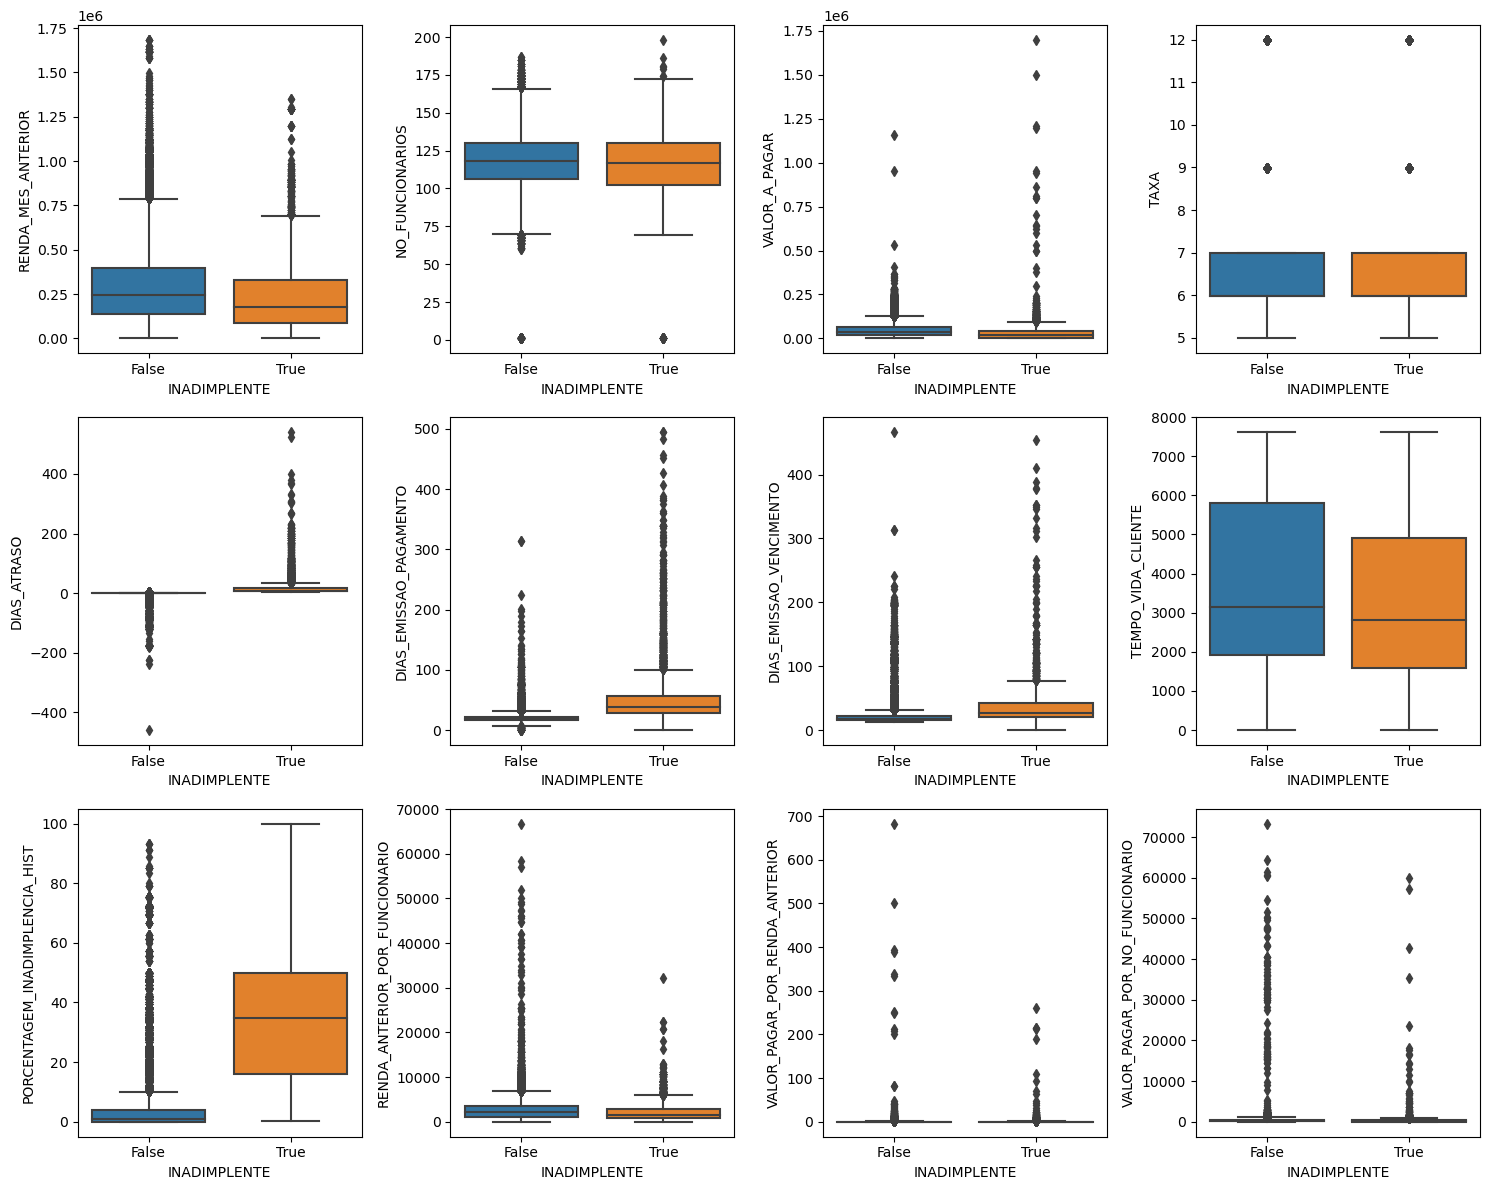

In [14]:
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(3, 4) 
linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(x='INADIMPLENTE', y=i, data=df, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 4:
        linha += 1
        coluna = 0            

plt.show()

****
### Correlação das variáveis numéricas

C:\Users\Fabio\AppData\Local\Temp\ipykernel_14472\1140806748.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='INADIMPLENTE').corr()


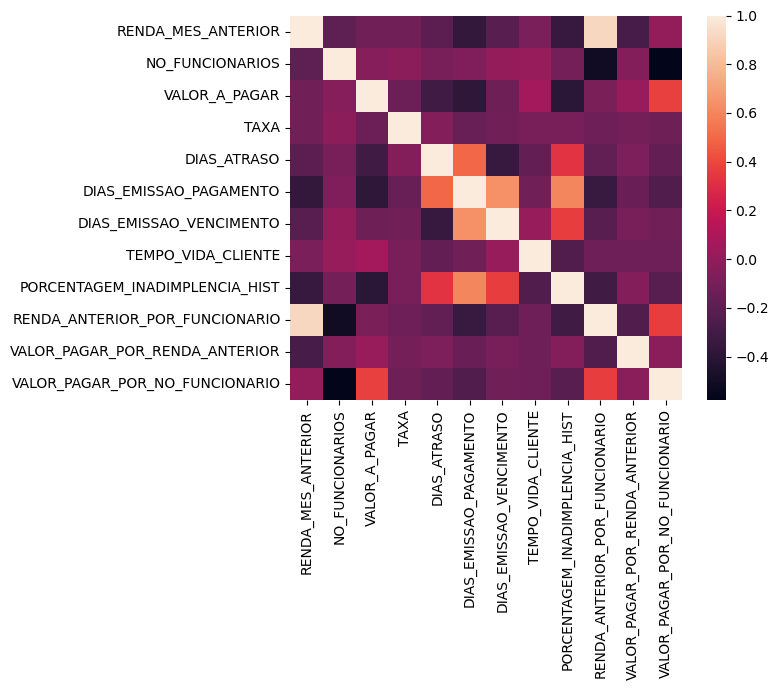

In [15]:
corr = df.drop(columns='INADIMPLENTE').corr()

plt.rcParams["figure.figsize"] = [8, 7]
plt.rcParams["figure.autolayout"] = True

sns.heatmap(corr.corr(), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [16]:
# Mostrar linhas com correlação maior que 0.8 e diferente de 1 (para retirar a diagonal)
corr[(corr > 0.8) & (corr != 1)].dropna(how='all')


,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,DIAS_EMISSAO_PAGAMENTO,DIAS_EMISSAO_VENCIMENTO,TEMPO_VIDA_CLIENTE,PORCENTAGEM_INADIMPLENCIA_HIST,RENDA_ANTERIOR_POR_FUNCIONARIO,VALOR_PAGAR_POR_RENDA_ANTERIOR,VALOR_PAGAR_POR_NO_FUNCIONARIO
RENDA_MES_ANTERIOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84,NaN,NaN
RENDA_ANTERIOR_POR_FUNCIONARIO,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# As features RENDA_MES_ANTERIOR e RENDA_ANTERIOR_POR_FUNCIONARIO tem correlação de quase 0.9.
# Por isso VALOR_PAGAR_POR_NO_FUNCIONARIO também será removida

df = df.drop(columns=['RENDA_ANTERIOR_POR_FUNCIONARIO'])
df

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,...,MES_EMISSAO_DOCUMENTO,MES_PAGAMENTO,MES_VENCIMENTO,MES_CADASTRO,MES_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
0,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-16,2018-10-09,2018-10-08,22427.25,5.99,1,...,9,10,10,8,9,2018,2018,2018,2013,2018
1,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-23,2018-10-15,2018-10-15,35608.11,5.99,0,...,9,10,10,8,9,2018,2018,2018,2013,2018
2,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-08,2018-10-30,2018-10-29,17988.49,5.99,1,...,10,10,10,8,10,2018,2018,2018,2013,2018
3,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-17,2018-11-07,2018-11-06,41998.20,6.99,1,...,10,11,11,8,10,2018,2018,2018,2013,2018
4,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-21,2018-11-12,2018-11-12,35514.41,6.99,0,...,10,11,11,8,10,2018,2018,2018,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73432,3148228961195376491,2021-06-01,343507.00,134.00,2021-06-13,2021-07-26,2021-07-28,17302.05,4.99,-2,...,6,7,7,12,6,2021,2021,2021,2015,2021
73433,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-14,2021-06-28,2021-06-29,19799.30,6.99,-1,...,6,6,6,7,6,2021,2021,2021,2019,2021
73434,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-17,2021-07-01,2021-07-02,19913.15,11.99,-1,...,6,7,7,7,6,2021,2021,2021,2019,2021
73435,4799794458216343260,2021-06-01,70449.00,141.00,2021-06-14,2021-07-13,2021-07-09,2806.09,6.99,4,...,6,7,7,12,6,2021,2021,2021,2019,2021


C:\Users\Fabio\AppData\Local\Temp\ipykernel_14472\869895705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(columns='INADIMPLENTE').corr()


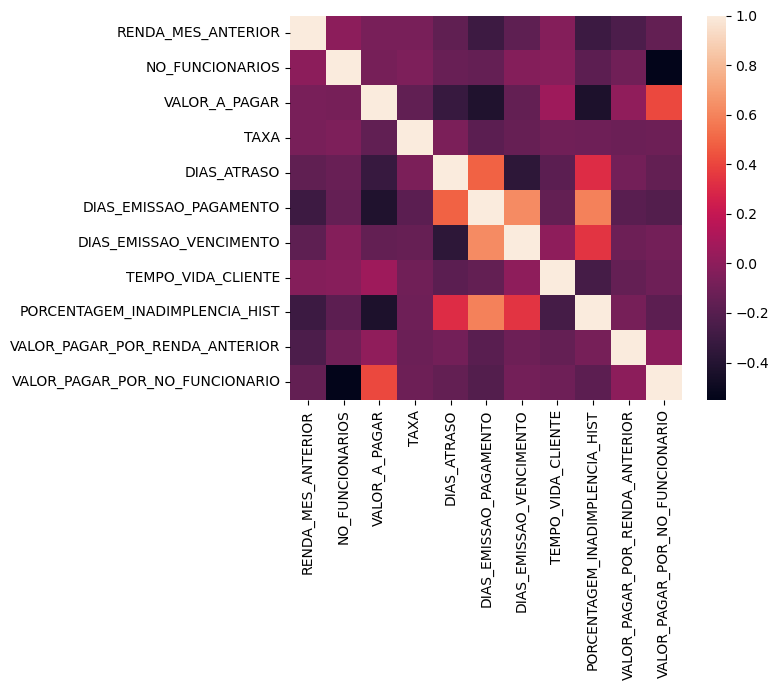

In [18]:
corr = df.drop(columns='INADIMPLENTE').corr()
sns.heatmap(corr.corr(), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

In [19]:
df

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATRASO,...,MES_EMISSAO_DOCUMENTO,MES_PAGAMENTO,MES_VENCIMENTO,MES_CADASTRO,MES_SAFRA_REF,ANO_EMISSAO_DOCUMENTO,ANO_PAGAMENTO,ANO_VENCIMENTO,ANO_CADASTRO,ANO_SAFRA_REF
0,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-16,2018-10-09,2018-10-08,22427.25,5.99,1,...,9,10,10,8,9,2018,2018,2018,2013,2018
1,1661240395903230676,2018-09-01,16913.00,92.00,2018-09-23,2018-10-15,2018-10-15,35608.11,5.99,0,...,9,10,10,8,9,2018,2018,2018,2013,2018
2,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-08,2018-10-30,2018-10-29,17988.49,5.99,1,...,10,10,10,8,10,2018,2018,2018,2013,2018
3,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-17,2018-11-07,2018-11-06,41998.20,6.99,1,...,10,11,11,8,10,2018,2018,2018,2013,2018
4,1661240395903230676,2018-10-01,236447.00,93.00,2018-10-21,2018-11-12,2018-11-12,35514.41,6.99,0,...,10,11,11,8,10,2018,2018,2018,2013,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73432,3148228961195376491,2021-06-01,343507.00,134.00,2021-06-13,2021-07-26,2021-07-28,17302.05,4.99,-2,...,6,7,7,12,6,2021,2021,2021,2015,2021
73433,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-14,2021-06-28,2021-06-29,19799.30,6.99,-1,...,6,6,6,7,6,2021,2021,2021,2019,2021
73434,2439954154030259398,2021-06-01,392975.00,121.00,2021-06-17,2021-07-01,2021-07-02,19913.15,11.99,-1,...,6,7,7,7,6,2021,2021,2021,2019,2021
73435,4799794458216343260,2021-06-01,70449.00,141.00,2021-06-14,2021-07-13,2021-07-09,2806.09,6.99,4,...,6,7,7,12,6,2021,2021,2021,2019,2021


****
### Dispersão entre as variáveis numéricas

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


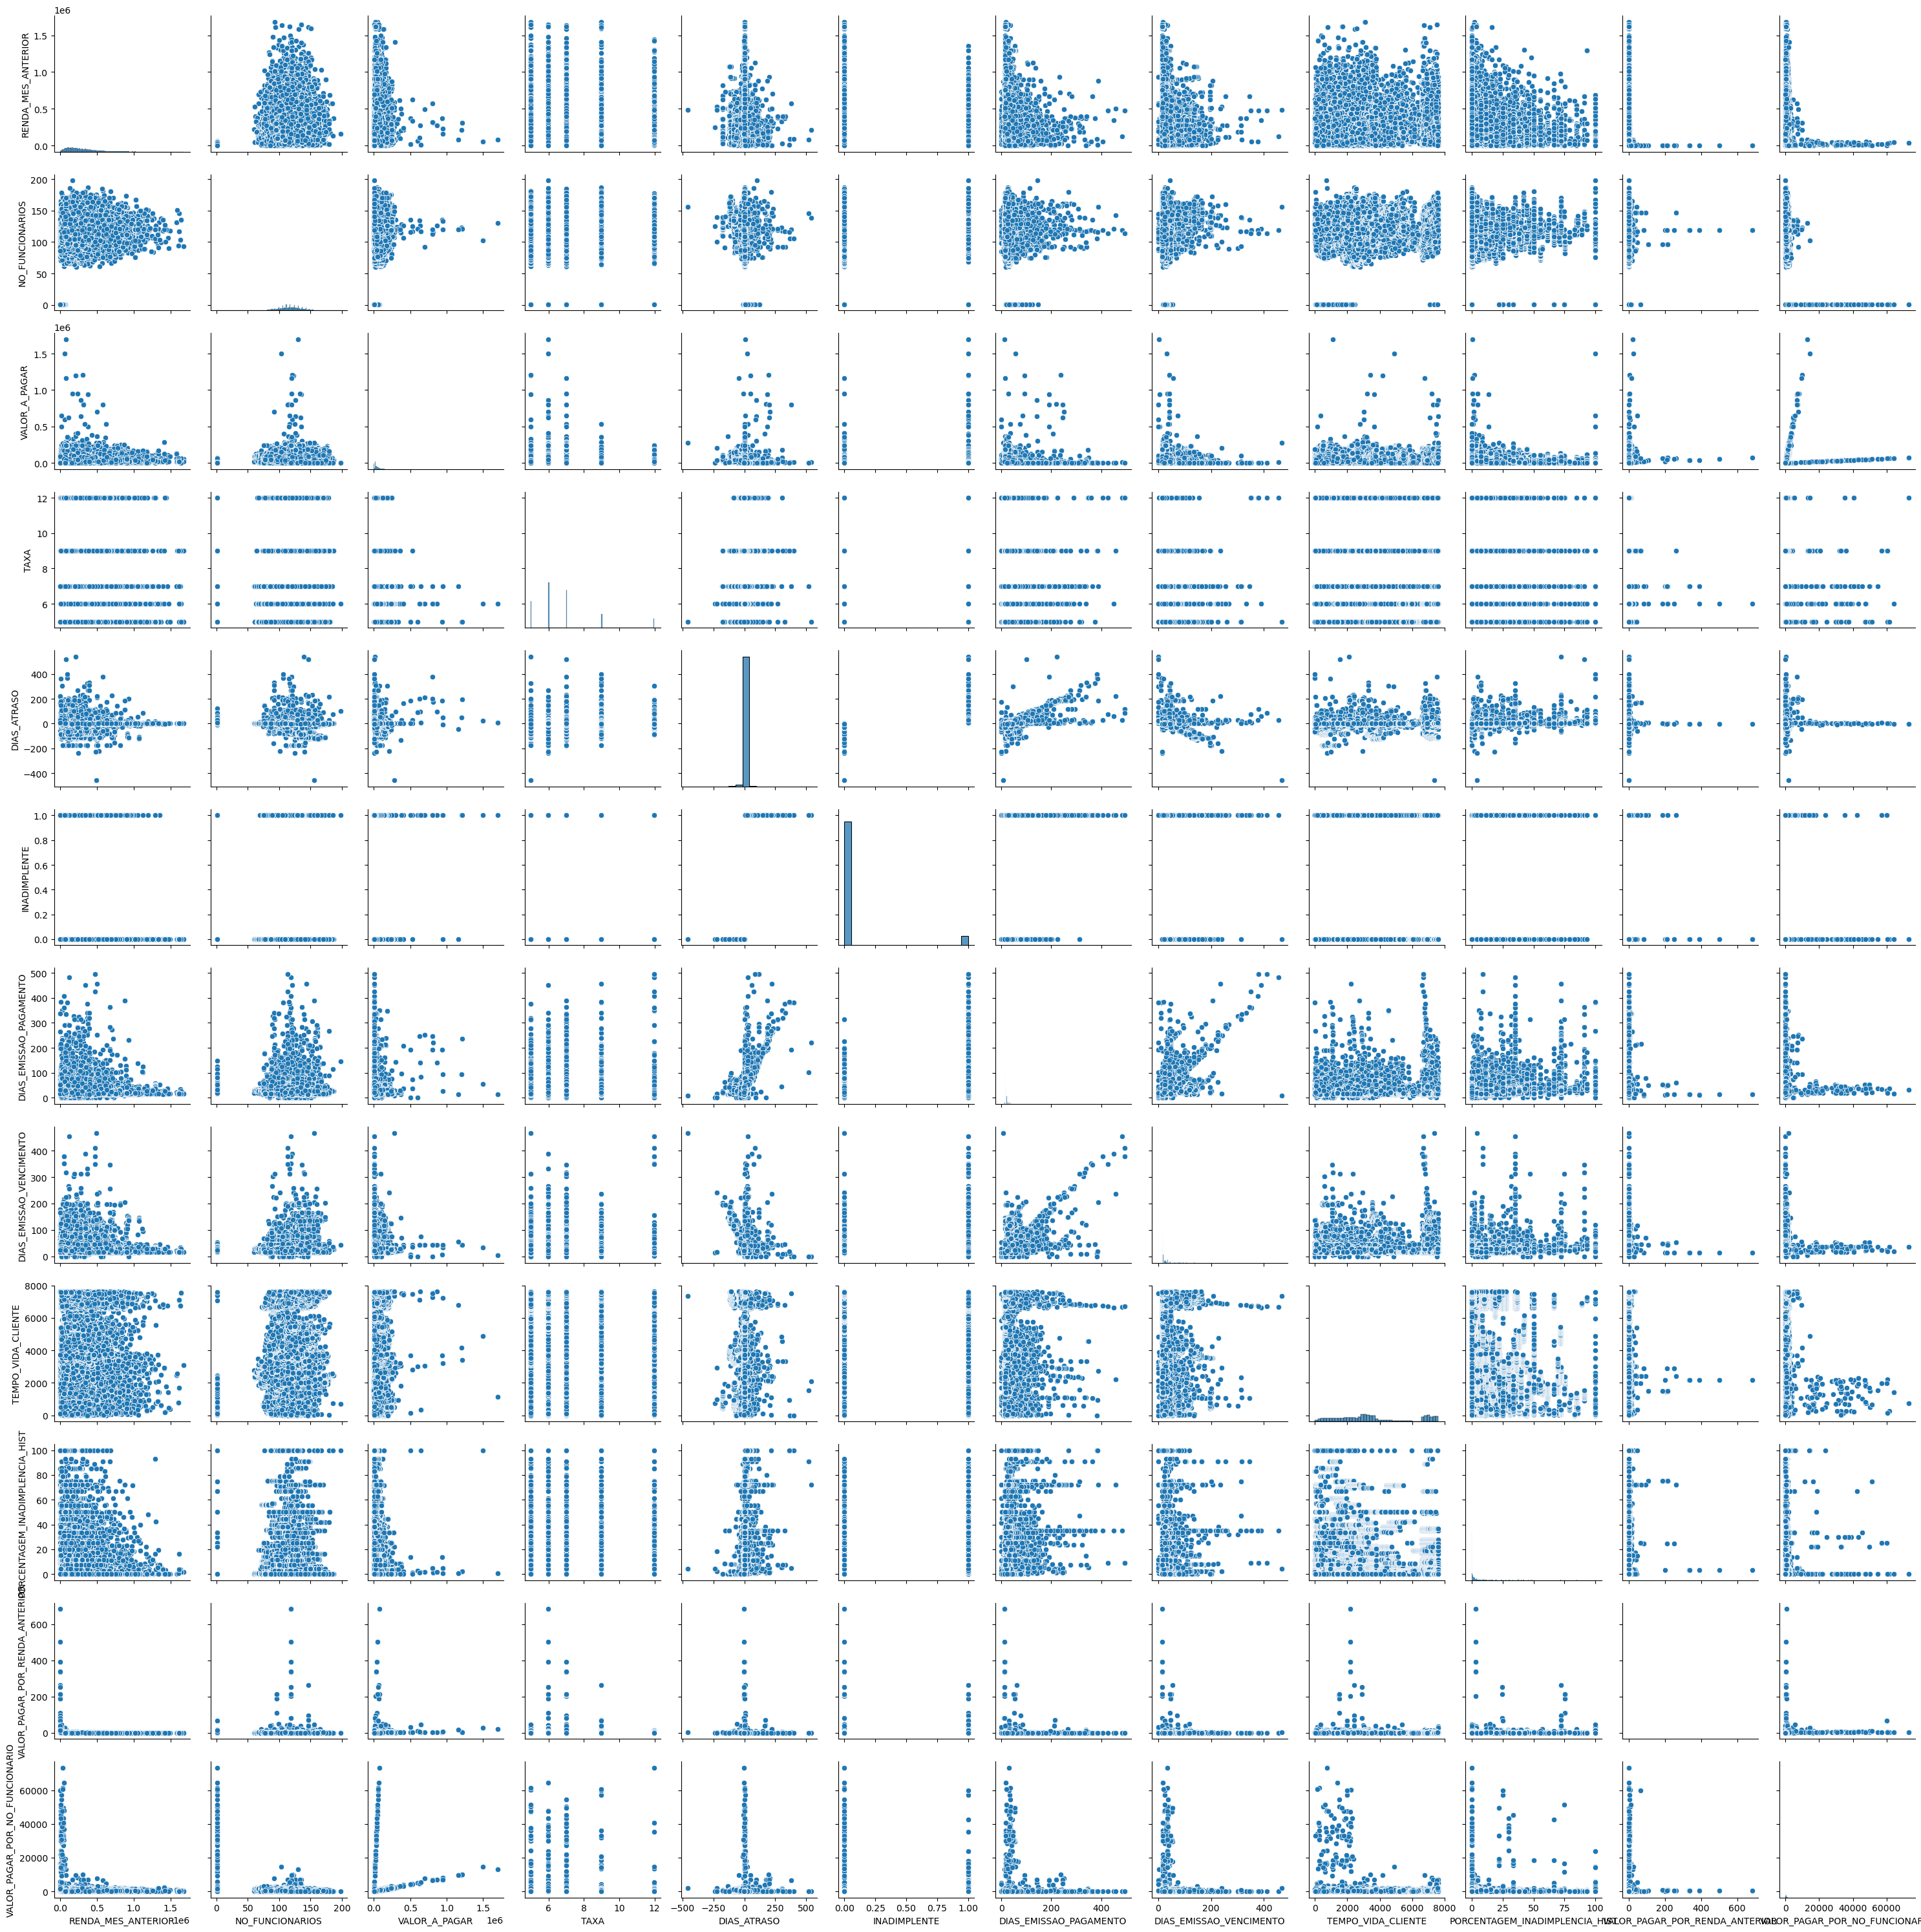

In [20]:
sns.pairplot(df)

****
## Análise das variáveis categóricas

In [21]:
variaveis_categoricas = ['INADIMPLENTE', 'DDD', 'FLAG_PF', 'SEGMENTO_INDUSTRIAL', 'DOMINIO_EMAIL', 'PORTE', 'CEP_2_DIG', 'DDD_1', 
                        'DIA_MES_EMISSAO', 'DIA_MES_PAGAMENTO', 'DIA_MES_VENCIMENTO',
                        'DIA_MES_CADASTRO', 'DIA_MES_SAFRA_REF', 'DIA_SEMANA_EMISSAO',
                        'DIA_SEMANA_PAGAMENTO', 'DIA_SEMANA_VENCIMENTO', 'DIA_SEMANA_CADASTRO',
                        'DIA_SEMANA_SAFRA_REF', 'MES_EMISSAO_DOCUMENTO', 'MES_PAGAMENTO',
                        'MES_VENCIMENTO', 'MES_CADASTRO', 'MES_SAFRA_REF',
                        'ANO_EMISSAO_DOCUMENTO', 'ANO_PAGAMENTO', 'ANO_VENCIMENTO',
                        'ANO_CADASTRO', 'ANO_SAFRA_REF']


In [22]:
len(variaveis_categoricas)

28

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


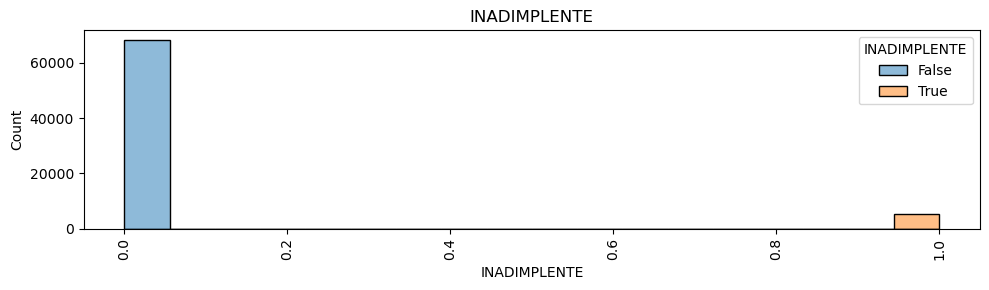

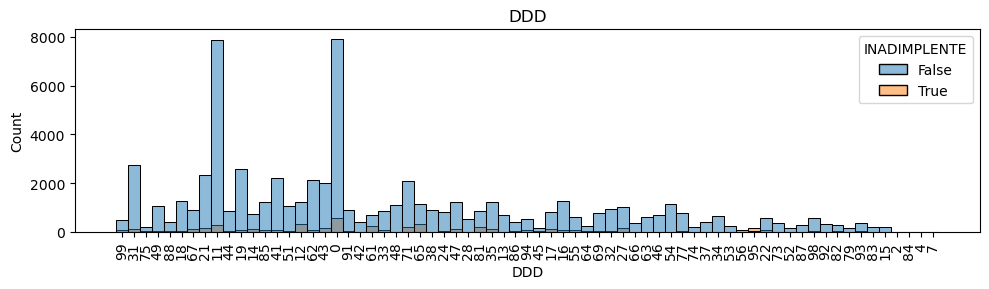

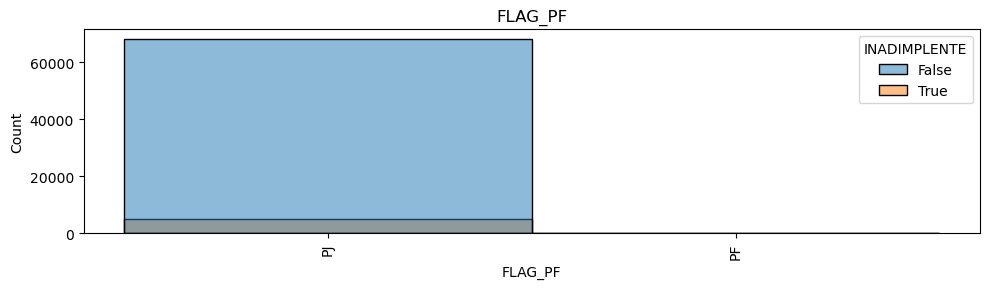

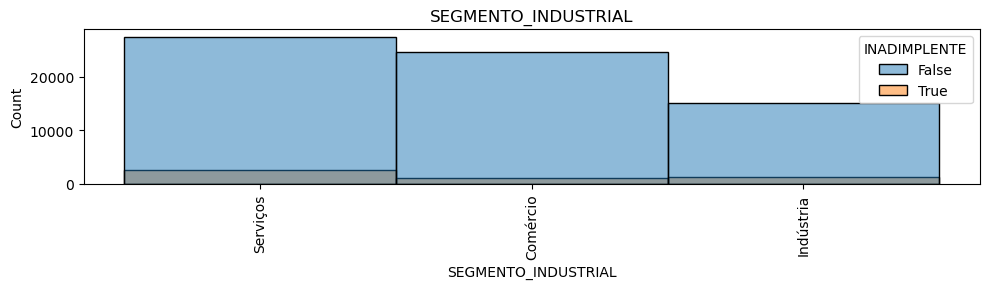

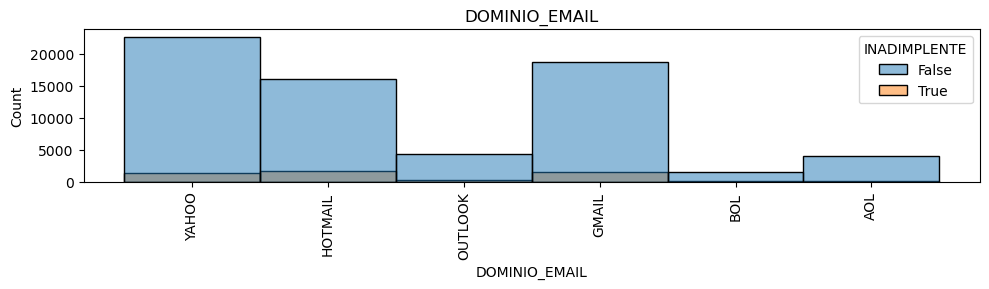

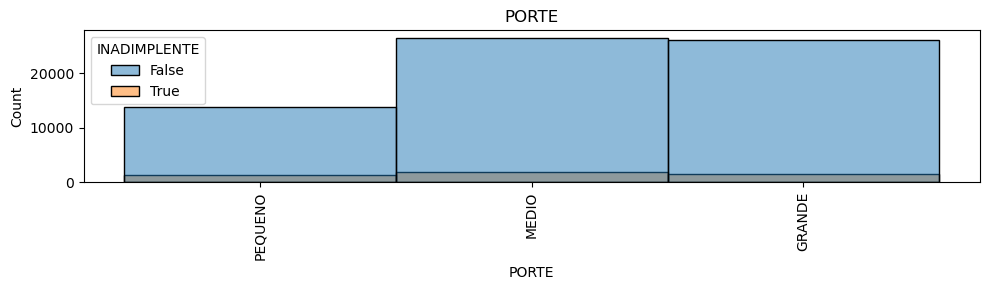

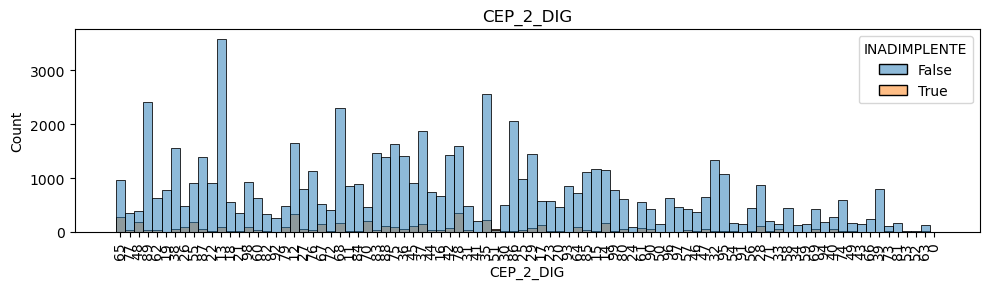

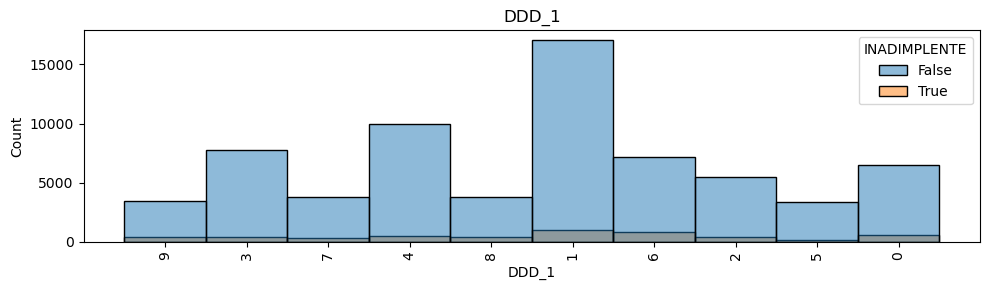

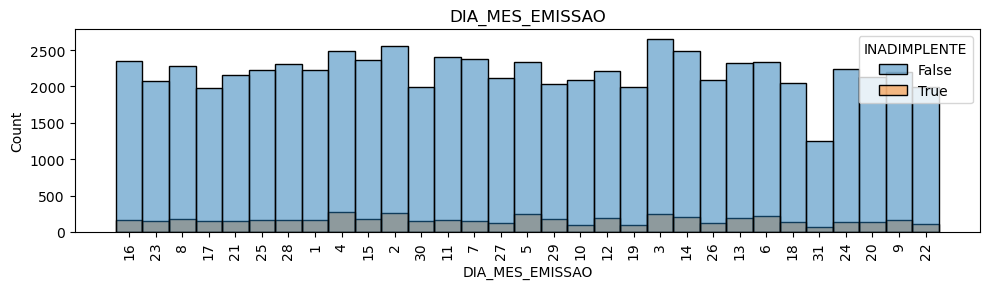

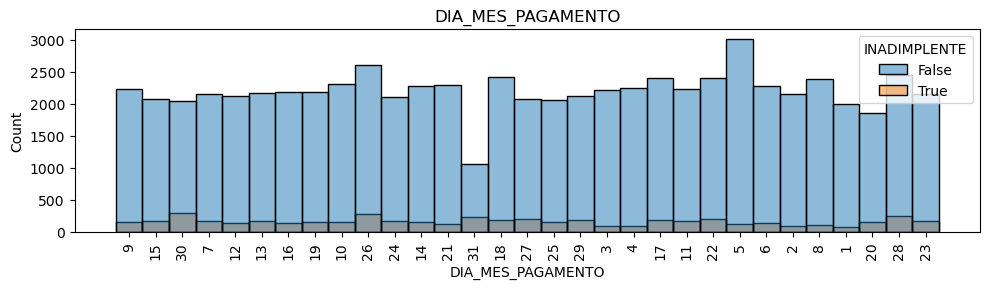

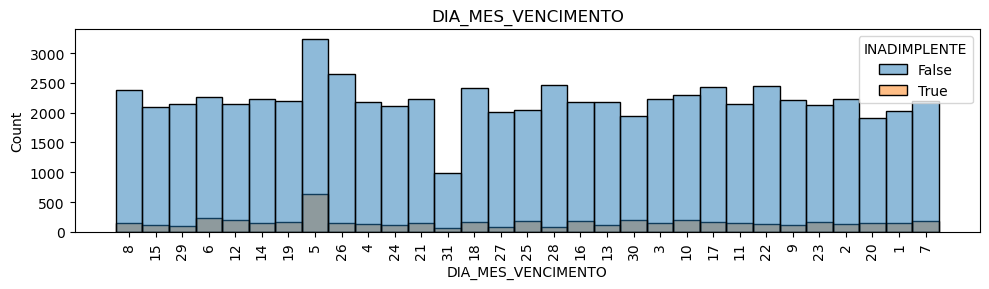

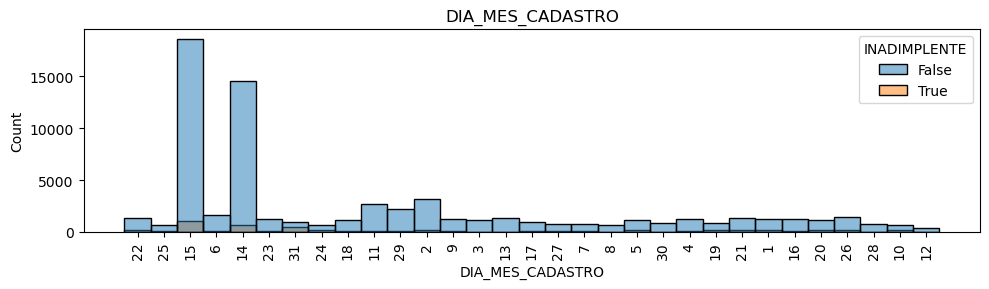

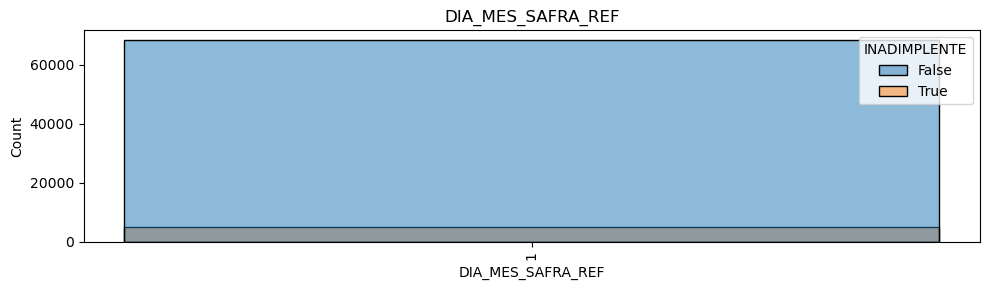

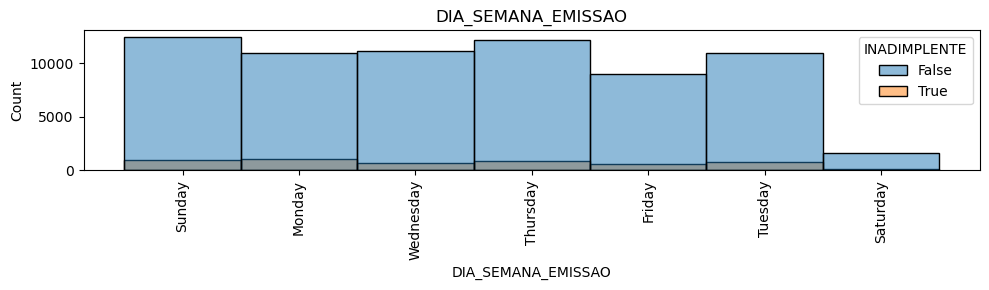

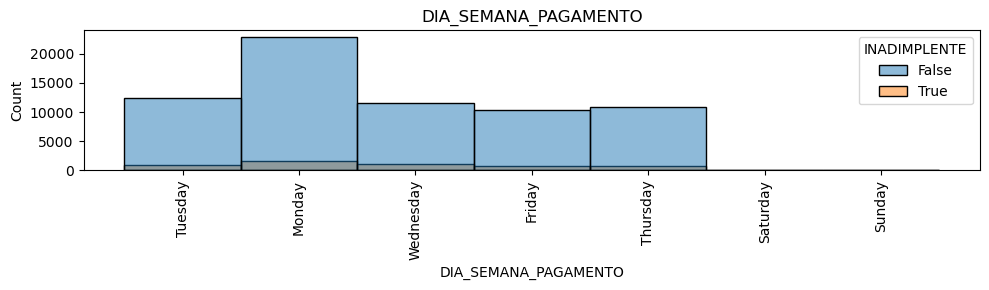

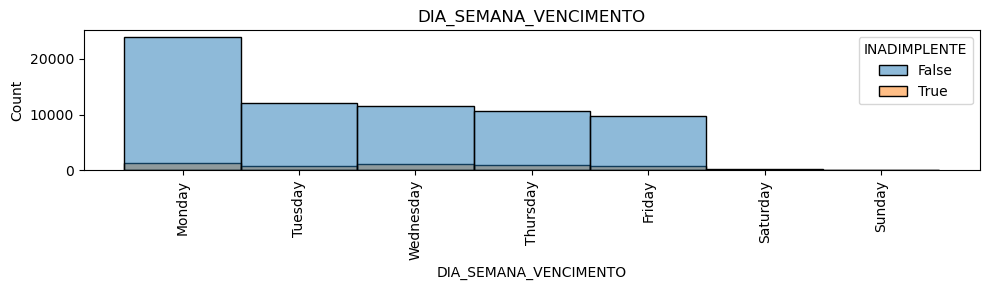

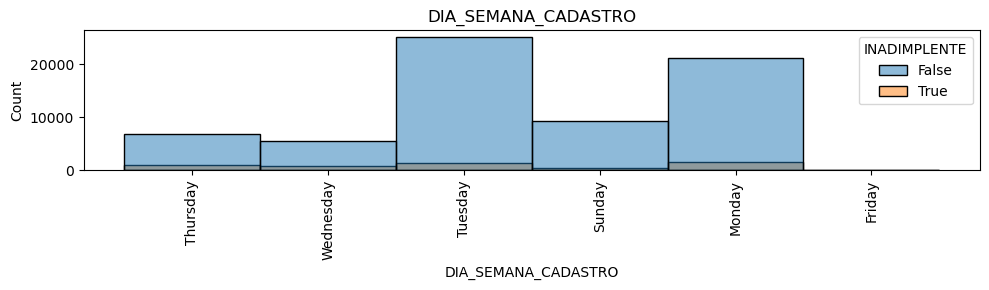

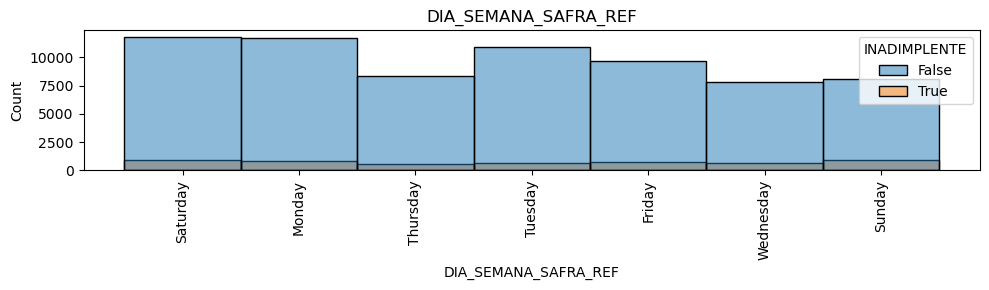

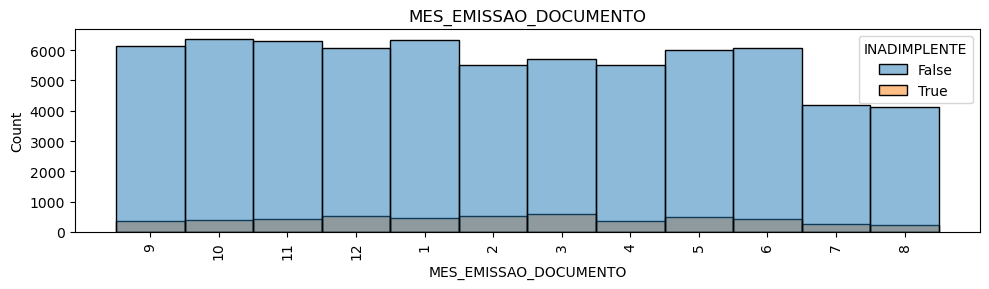

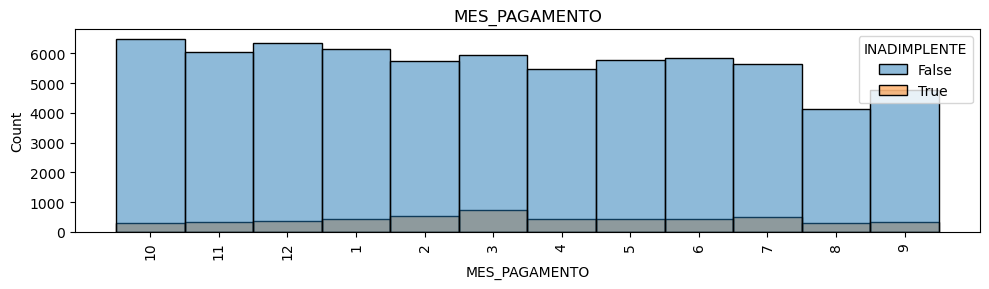

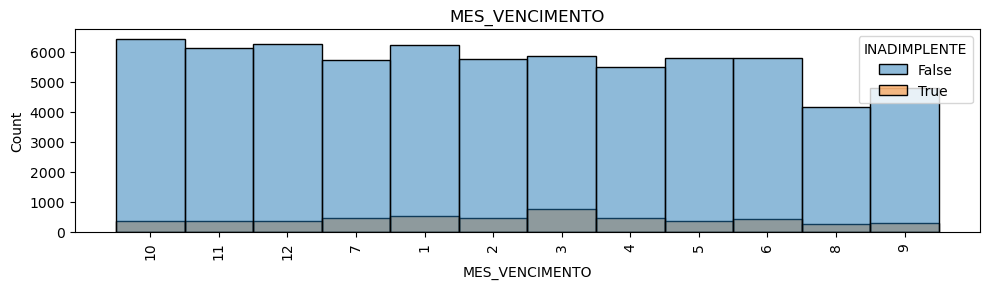

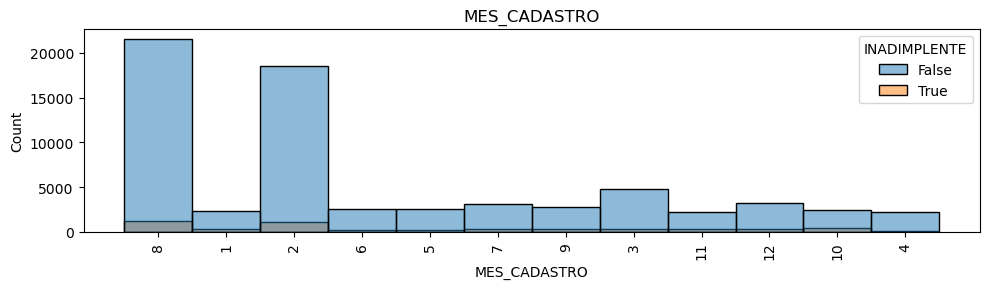

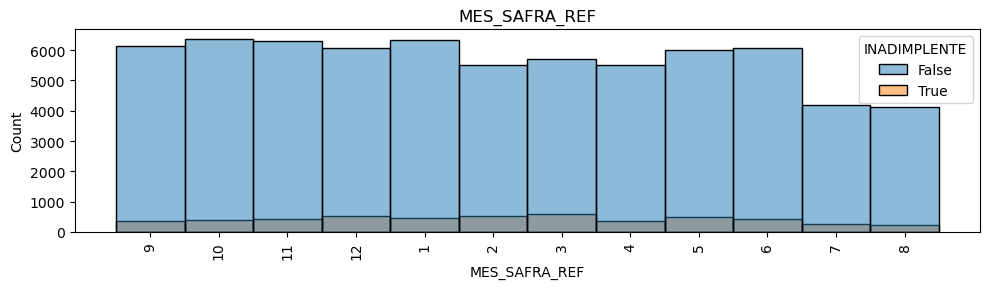

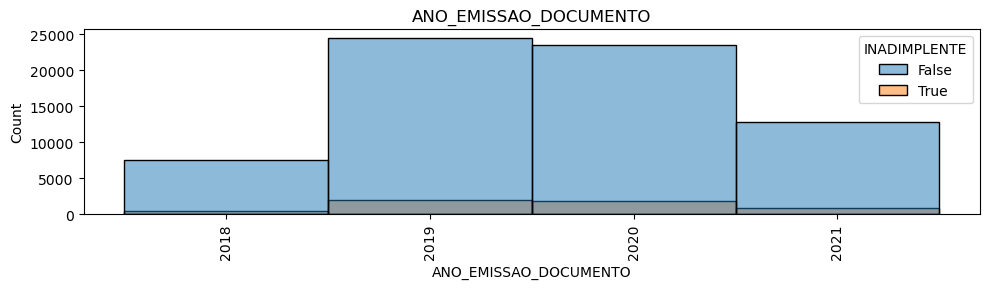

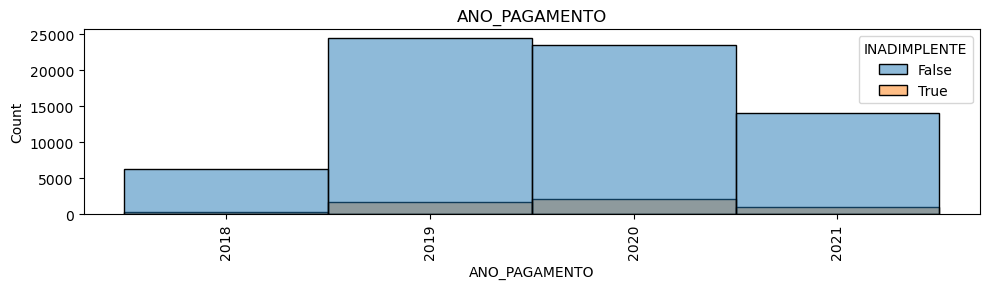

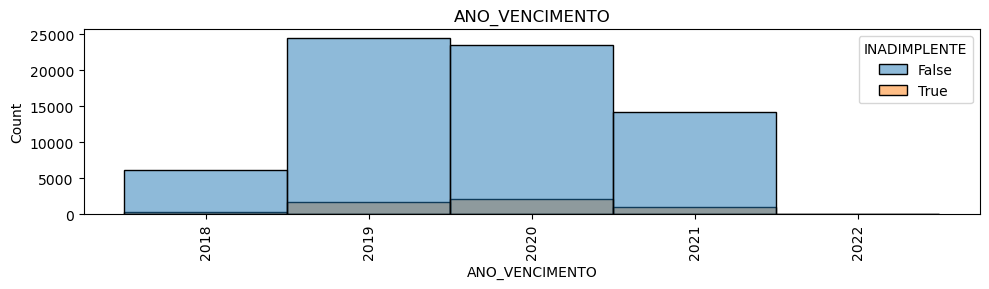

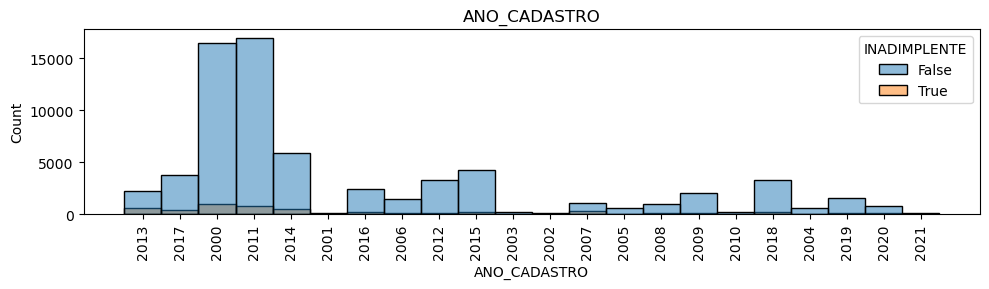

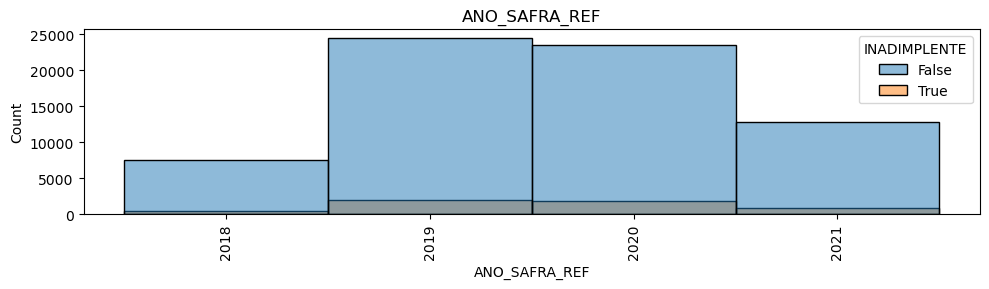

In [23]:
plt.rcParams["figure.figsize"] = [10, 3]
plt.rcParams["figure.autolayout"] = True

for i in variaveis_categoricas: 
  ax = sns.histplot(data=df, x=i, hue ='INADIMPLENTE')
  plt.xticks(rotation=90)
  plt.title(i)
  plt.show()         



### ** Necessita ser balanceado


****
### Persistência dos dados

In [24]:
df.to_csv('../data/2_intermediate/3_df_eda.csv', index=False)

****
## Conclusões:

- Optei por manter os outliers, removendo apenas os ponto visualmente mais distoantes
- Features removidas:
    - RENDA_ANTERIOR_POR_FUNCIONARIO:
        - = Renda do mês anterior / Nº Funcionarios
        - Alta correlação com RENDA_MES_ANTERIOR
- Quando mais frequente for as ocorrências de inadimplência no histórico do cliente, maior a chance dele voltar a atrasar
- Quanto maior for o tempo de vida do cliente, menor a chance dele ser inadimplente
- Será necessário balancear a base de treino
- Acredito que seria válido um estudo de monotonicidade das variáveis, mas pelo prazo disponibilizado para o desenvolvimento, não consegui avançar nessa parte.